In [1]:
import pandas as pd
import pickle
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from collections import defaultdict
import DataLoader

In [65]:
# test_data = pd.read_json("data/test_data_100.json").iloc[0].to_dict()["recipes"]
# test_data = { int(recipe_id): info for recipe_id, info in test_data.items()}
# with open("data/test_data_100.pkl", "wb") as out:
#     pickle.dump(test_data, out)

# with open("data/test_data_100.pkl", "rb") as infile:
#     test_data = pickle.load(infile)

# Extract user ratings to matrix from test data
def extract_user_ratings(data):
    ratings_data = []
    for recipe_id, attributes in data.items():
        if "user ratings" in attributes:
            for user_id, rating in attributes["user ratings"].items():
                ratings_data.append((int(user_id), int(recipe_id), rating))
    return pd.DataFrame(ratings_data, columns=["user_id", "recipe_id", "rating"])

# ratings.to_csv("data/test_ratings_100.csv")
# test_data[8906]

{'aggregate rating': {'rating': 3.64, 'reviewCount': 10},
 'calories': 376,
 'categories': ['Main', 'Dinner', 'Lowcarb', 'Chicken'],
 'directions': ['Preheat oven to 350 degrees F (175 degrees C).                            ',
  'In a medium mixing bowl, combine the melted butter/margarine, chili sauce, lemon juice, salt, mustard and curry powder. Mix well.                            ',
  'Place chicken in a lightly greased 9x13 inch baking dish and pour mixture over chicken. Bake in preheated oven for 50 minutes or until tender and juices run clear.                            '],
 'image': 'https://images.media-allrecipes.com/userphotos/560x315/2995469.jpg',
 'ingredients': [{'descriptors': ['melted'],
   'key ingredient': 'butter',
   'line': '1/2 cup butter, melted',
   'quantity': 0.5,
   'unit': 'cups'},
  {'key ingredient': 'chile sauce',
   'line': '12 ounces chile sauce',
   'quantity': 12.0,
   'unit': 'ounces'},
  {'key ingredient': 'lemon juice',
   'line': '2 tablespoons le

In [22]:
# with open("data/user_dict.pkl", "rb") as infile:
#     user_data = pickle.load(infile)

ratings = pd.read_csv("data/all_recipe_clean.csv")
recipe_rating_counts = ratings.recipe_id.value_counts()
recipe_ids = recipe_rating_counts[recipe_rating_counts >= 5].index.unique().values
recipe_ids = frozenset(recipe_ids)
ratings_filtered = ratings[ratings.recipe_id.isin(recipe_ids)]
ratings = ratings_filtered

,recipe_title,rating,review_date_stamp,user_id,recipe_id,review_date
0,Creamy Arugula Sauce,4,2/17/2013,13881,908,2/17/2013
1,Creamy Arugula Sauce,5,7/2/2014,5969,908,7/2/2014
2,Insanely Easy Vegetarian Chili,5,10/2/2008,24002,3160,10/2/2008
3,Insanely Easy Vegetarian Chili,5,6/23/2008,62897,3160,6/23/2008
4,Insanely Easy Vegetarian Chili,5,9/17/2003,87580,3160,9/17/2003
5,Insanely Easy Vegetarian Chili,3,7/6/2007,35045,3160,7/6/2007
6,Insanely Easy Vegetarian Chili,4,11/11/2008,52212,3160,11/11/2008
7,Insanely Easy Vegetarian Chili,3,2/7/2010,18803,3160,2/7/2010
8,Insanely Easy Vegetarian Chili,4,11/19/2007,36964,3160,11/19/2007
9,Insanely Easy Vegetarian Chili,5,9/6/2008,36995,3160,9/6/2008


In [6]:
print("Ratings Data")
print("Number of Ratings: {}".format(len(ratings)))
print("Number of Recipes: {}".format(len(ratings.recipe_id.value_counts())))
print("Number of Users: {}".format(len(ratings.user_id.value_counts())))
print("Average Rating: {0:.3f}".format(ratings.rating.mean()))

# ratings

Ratings Data
Number of Ratings: 161136
Number of Recipes: 3201
Number of Users: 87221
Average Rating: 4.500


Text(0.5, 0, 'Rating')

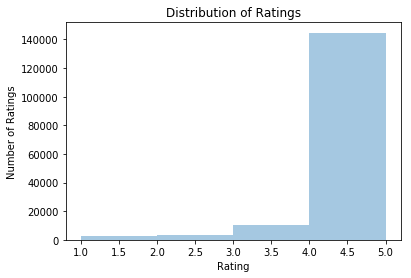

In [7]:
# TODO: Distribution of recipe ratings
# ratings.recipe_id.value_counts()

#TODO: Distribution of user ratings


# Distribution of Ratings
rating_values = ratings.rating.values
bins = bins=np.arange(rating_values.min(), rating_values.max() + 1)
ax = sns.distplot(rating_values, kde=False, bins=bins)
ax.set_title("Distribution of Ratings")
ax.set_ylabel("Number of Ratings")
ax.set_xlabel("Rating")

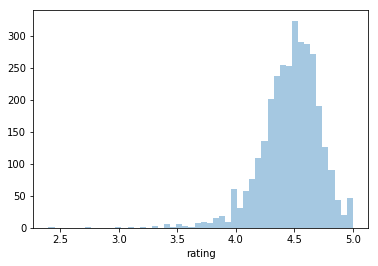

In [8]:
recipe_ratings = ratings.groupby("recipe_id").rating.mean()
ax = sns.distplot(recipe_ratings, kde=False)

Text(0.5, 0, 'Number of Ratings given to Recipe')

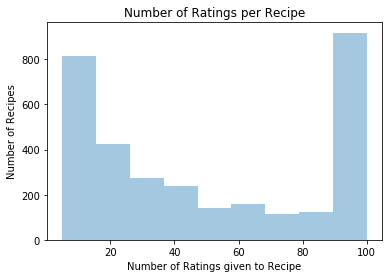

In [9]:
# Ratings counts
ax = sns.distplot(ratings.recipe_id.value_counts().values, kde=False)
ax.set_title("Number of Ratings per Recipe")
ax.set_ylabel("Number of Recipes")
ax.set_xlabel("Number of Ratings given to Recipe")

In [16]:
# User Ratings
# ax = sns.distplot(ratings.user_id.value_counts().values, kde=False)
# ax = sns.boxplot(x=ratings.user_id.value_counts().values)
# print("Number of ratings per user")
# ratings.user_id.value_counts().describe()

# recipe_ratings = ratings_filtered.groupby("recipe_id").rating.mean().values
# ax = sns.distplot(recipe_ratings, kde=False)
# ax.set_title("Filtered Recipe Ratings Distribution")
# ax.set_xlabel("Rating")
# ax.set_ylabel("Recipe Count")

# from collections import Counter
# Counter(ratings.user_id.value_counts().values)

np.sum(ratings.user_id.value_counts().values >= 5)

4215

In [160]:
# user_rating_counts = ratings.user_id.value_counts()
# user_rating_counts = user_rating_counts[user_rating_counts >= 3]

# train_users, test_users = train_test_split(ratings.user_id.unique(), test_size=0.2, random_state=0)

# ratings.user_id.unique()
# test_users.shape
# 
# user_rating_counts[user_rating_counts >= 3].index.unique().values

# np.sum(ratings.recipe_id.value_counts() >= 5)

# ratings_filtered = ratings[ratings.user_id.isin(frozenset(train_users))]

# ratings_filtered.groupby("recipe_id").user_id.apply(np.array)

# ratings_filtered.groupby("user_id").recipe_id.apply(set)

recipe_id
0       [17996, 83450, 66642, 36626, 67616, 41640, 349...
1       [75486, 82861, 51605, 17536, 10438, 71731, 241...
2       [33811, 48434, 75221, 82269, 29354, 43795, 707...
3       [78169, 1681, 10291, 33621, 64075, 86405, 8262...
4       [28046, 30610, 25697, 33811, 41963, 82522, 448...
5                     [39678, 76277, 57673, 86883, 61282]
7       [78218, 54600, 80938, 30832, 46395, 49031, 493...
8              [38919, 62643, 83368, 43681, 19215, 79908]
10      [69975, 34575, 12958, 68776, 14960, 1368, 7461...
11      [20482, 1852, 34491, 31134, 67876, 15022, 5259...
12      [1120, 22744, 79533, 76793, 41370, 47721, 1904...
13      [19841, 4744, 71710, 85034, 56304, 77948, 7273...
14        [85510, 1282, 30074, 71699, 9215, 44647, 35220]
15      [49480, 13334, 76337, 8366, 67819, 73977, 6864...
16      [44537, 1899, 84540, 42861, 47634, 68086, 4520...
17      [43679, 15618, 73723, 49474, 75414, 67580, 102...
18      [57366, 45783, 36843, 6378, 81471, 19811, 1968...
19  

In [132]:
# ratings_filtered[ratings_filtered.recipe_id == 5].user_id
# ratings_dict = ratings_filtered.groupby(["user_id", "recipe_id"]).rating.apply(sum)

ratings_dict[8][194]

4

In [4]:
dataLoader = DataLoader.DataLoader(ratings)
user_holdout, recipe_holdout, holdout = dataLoader.get_holdout_data()
# for user_id, user_recipes in dataLoader.user_to_recipes_train.items():
# #     print(user_id, user_recipes)
#     hidden_recipe_id = np.random.choice(user_recipes)
#     print(hidden_recipe_id)

# dataLoader.all_ratings[4]

In [5]:
# dataLoader.get_user_ratings(4, user_holdout)
dataLoader.get_recipe_ratings(2843, recipe_holdout)
# r2r = dataLoader.recipe_to_raters_train
# huid = recipe_holdout[2843]
# raters = r2r[2843]

# for uid in raters:
#     print(uid)
#     print(dataLoader.all_ratings[uid][2843])
#     print(uid, dataLoader.all_ratings[uid][2843])
#     print(uid, dataLoader.all_ratings[uid])
# dataLoader.recipe_to_raters_train

# r2r = ratings[~ratings.user_id.isin(frozenset(dataLoader.test_users))].groupby("recipe_id").user_id.apply(list)

# recipe_holdout[2843]

# {user_id : {k[1]: rating for recipe_id, rating in v.items()} for k, rating in dataLoader.all_ratings.items()}

# ratings_dict = defaultdict(dict)
# for k, rating in dataLoader.all_ratings.items():
#     user_id, recipe_id = k
#     ratings_dict[user_id][recipe_id] = rating

# dataLoader.all_ratings

# for user_id, recipe_id, rating in holdout:
# #     print(recipe_id, len(dataLoader.get_recipe_ratings(recipe_id, recipe_holdout)))
#     if len(dataLoader.get_recipe_ratings(recipe_id, recipe_holdout)) == 0:
#         print(recipe_id)

{5890: 5,
 27395: 5,
 27140: 2,
 50693: 5,
 4: 5,
 44551: 5,
 36360: 5,
 11012: 5,
 65797: 4,
 32520: 5,
 17420: 4,
 52489: 5,
 31247: 5,
 64017: 4,
 39189: 5,
 8738: 5,
 42274: 5,
 59683: 4,
 55076: 5,
 8485: 1,
 77095: 4,
 85288: 3,
 48423: 5,
 33328: 4,
 70447: 5,
 34866: 1,
 63281: 5,
 20792: 5,
 58943: 5,
 52031: 5,
 36417: 5,
 37187: 4,
 38984: 5,
 18254: 4,
 13136: 5,
 54098: 5,
 83294: 4,
 24415: 5,
 33383: 5,
 7272: 4,
 79208: 4,
 44393: 5,
 36459: 3,
 25709: 5,
 30574: 5,
 28790: 5,
 73335: 5,
 73592: 1,
 2424: 5,
 2685: 5,
 41603: 5,
 85637: 5,
 6027: 5,
 87436: 5,
 20363: 4,
 16018: 5,
 64916: 4,
 53403: 4,
 27038: 5,
 5287: 5,
 67497: 4,
 41903: 5,
 13231: 5,
 16563: 3,
 39605: 5,
 82110: 5,
 39616: 5,
 7361: 5,
 63686: 4,
 55245: 5,
 19410: 5,
 24020: 5,
 27606: 5,
 13786: 4,
 62943: 4,
 38115: 5,
 49639: 5,
 28395: 5,
 71659: 4,
 73967: 4,
 59632: 5,
 4336: 5,
 61168: 5,
 65780: 5,
 87031: 5,
 251: 3,
 78590: 4,
 19455: 3}